VARIABLE SELECTION WITH LASSO
This link may be helpful to understand the concept of LASSO.
https://towardsdatascience.com/variable-selection-using-lasso-493ac2e5660d

In [ ]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [10]:
#Loading Data 
profiler = pd.read_csv("Boyd_data.csv")

X_train, X_test, y_train, y_test = train_test_split(profiler[["Turbidity (FNU)", "DissOxygen (mg/l)", "SpCond (us/cm)", "pH"]],
                                                    profiler["Chla_mean"], train_size=0.7, random_state=123)

from sklearn.preprocessing import MinMaxScaler
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

In [11]:
#Variable selection using LASSO
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
import numpy as np
n_lambda = 100
lambdas1 = np.logspace(-6,0, n_lambda)

MSE_train = []
MSE_test = []
coefs = []
for ld in lambdas1:
    lassocv = Lasso(alpha=ld)
    model_LS = lassocv.fit(X_train_scaled, y_train_scaled)
    y_predLS_cv_train = model_LS.predict(X_train_scaled)
    y_predLS_cv_test = model_LS.predict(X_test_scaled)
    MSE_train.append(mse(y_train_scaled,y_predLS_cv_train))
    MSE_test.append(mse(y_test_scaled,y_predLS_cv_test))
    coefs.append(model_LS.coef_)  
    
coef_df = pd.DataFrame(coefs)
coef_df.columns = X_train.columns

Text(0, 0.5, 'MSE')

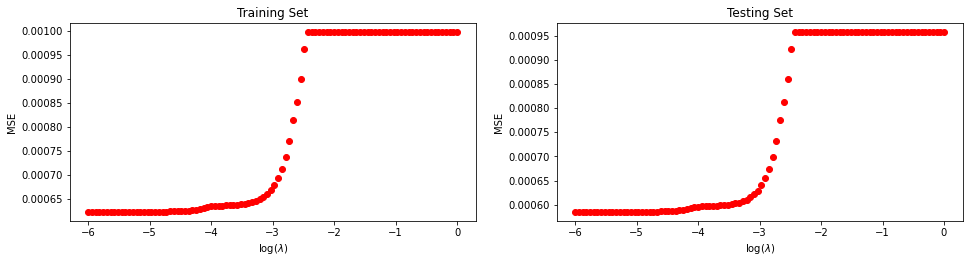

In [12]:
#Plotting log lambda against each MSE value
fig, ax = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=False)
ax1 = plt.subplot(221)
ax1.scatter(np.log10(lambdas1), MSE_train,color="red")
ax1.set_title("Training Set")
ax2 = plt.subplot(222)
ax2.scatter(np.log10(lambdas1), MSE_test,color="red")
ax2.set_title("Testing Set")

ax1.set_xlabel("log($\\lambda$)")
ax2.set_xlabel("log($\\lambda$)")
ax1.set_ylabel('MSE')
ax2.set_ylabel('MSE')

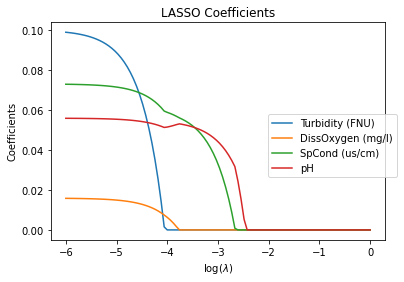

In [13]:
#Plotting log lambda against each coefficient
ax = plt.gca()
for i in range(0,coef_df.columns.size):
    ax.plot(np.log10(lambdas1), coef_df.iloc[:,i])
    
ax.legend(coef_df.columns,bbox_to_anchor = (1.05, 0.6))
#ax.set_xscale('log')
plt.xlabel("log($\\lambda$)")
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients')
plt.axis('tight')
plt.show()
plt.show()
#The selected lambda value determines the parameter to be selected. (Parameters whose coefficients are not zero at the chosen lambda values are selected)